<a href="https://colab.research.google.com/github/ormarin2000/Portfolio/blob/main/SARIMA_Model_AAPL_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install libraries if needed
install.packages('tidyquant')
install.packages('quantmod')
install.packages('stargazer')
install.packages('haven')
install.packages('skedastic')
install.packages('car')
install.packages('datasets')
install.packages('tseries')
install.packages('forecast')
install.packages('TTR')

In [ ]:
#Load necessary libraries
library('quantmod')
library('tidyquant')
library('tidyverse')
library('stargazer')
library('haven')
library('car')
library('datasets')
library('tseries')
library('forecast')
library('TTR')
library('lmtest')

In [ ]:
#Get the weekly data
aapl_weekly_data <- tq_get('AAPL', periodicity = "weekly")

In [ ]:
#Visualize data
aapl_weekly_data

#Get adjusted closing prices
aapl_weekly_data_adjusted <- select(aapl_weekly_data, date, adjusted)
aapl_weekly_data_adjusted

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2014-01-01,19.84571,19.89393,19.05714,19.28714,1356972400,16.88733
AAPL,2014-01-08,19.24321,19.53071,18.92429,19.51393,1553708800,17.08590
AAPL,2014-01-15,19.76857,20.00714,19.28214,19.60964,1376183200,17.16970
AAPL,2014-01-22,19.67536,19.90321,17.93107,18.08929,2832981200,15.83851
AAPL,2014-01-29,17.99821,18.19500,17.62679,18.17107,2424254000,15.91012
AAPL,2014-02-05,18.09143,19.20536,18.08036,19.14143,1584206400,16.75974
AAPL,2014-02-12,19.17679,19.68536,19.04429,19.49964,1148674800,17.17558
AAPL,2014-02-19,19.45536,19.53179,18.60714,18.64500,1419272400,16.42280
AAPL,2014-02-26,18.70036,19.02679,18.41429,18.97286,1447989200,16.71158


date,adjusted
<date>,<dbl>
2014-01-01,16.88733
2014-01-08,17.08590
2014-01-15,17.16970
2014-01-22,15.83851
2014-01-29,15.91012
2014-02-05,16.75974
2014-02-12,17.17558
2014-02-19,16.42280
2014-02-26,16.71158


Warning message:
“The following aesthetics were dropped during statistical transformation: open,
high, low, close, y
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: x,
open, high, low, close, y
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


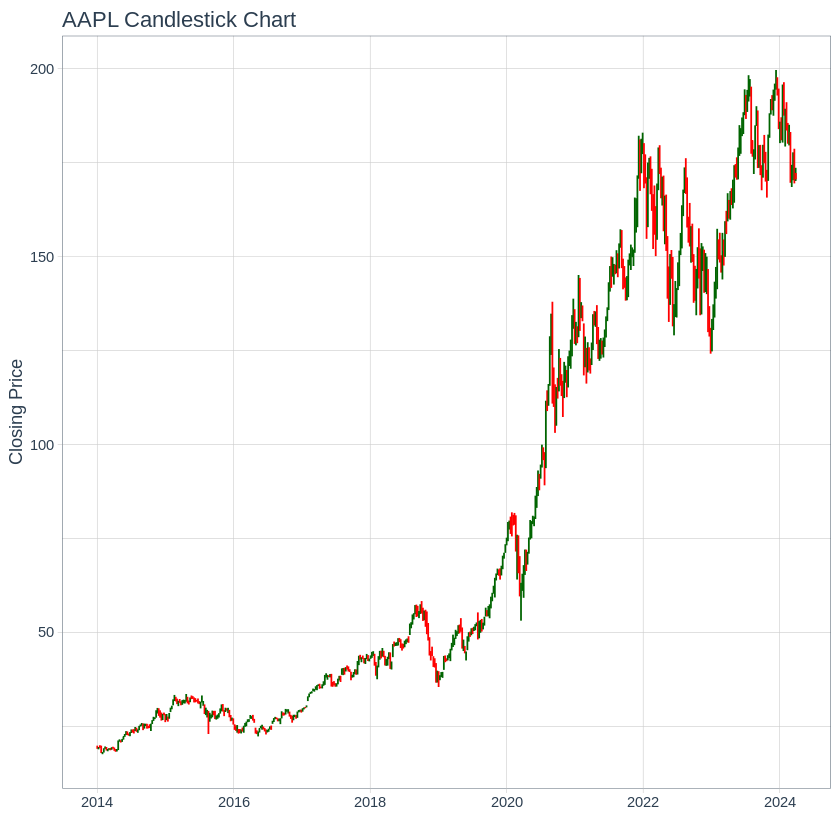

In [ ]:
#Visualize it in a candlestick chart
aapl_weekly_data %>%
    ggplot(aes(x = date, y = close)) +
    geom_candlestick(aes(open = open, high = high, low = low, close = close), colour_up = "darkgreen", fill_up = "darkgreen") +
    labs(title = "AAPL Candlestick Chart", y = "Closing Price", x = "") +
    theme_tq()

Warning message:
“The following aesthetics were dropped during statistical transformation: open,
high, low, close, y
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: x,
open, high, low, close, y
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


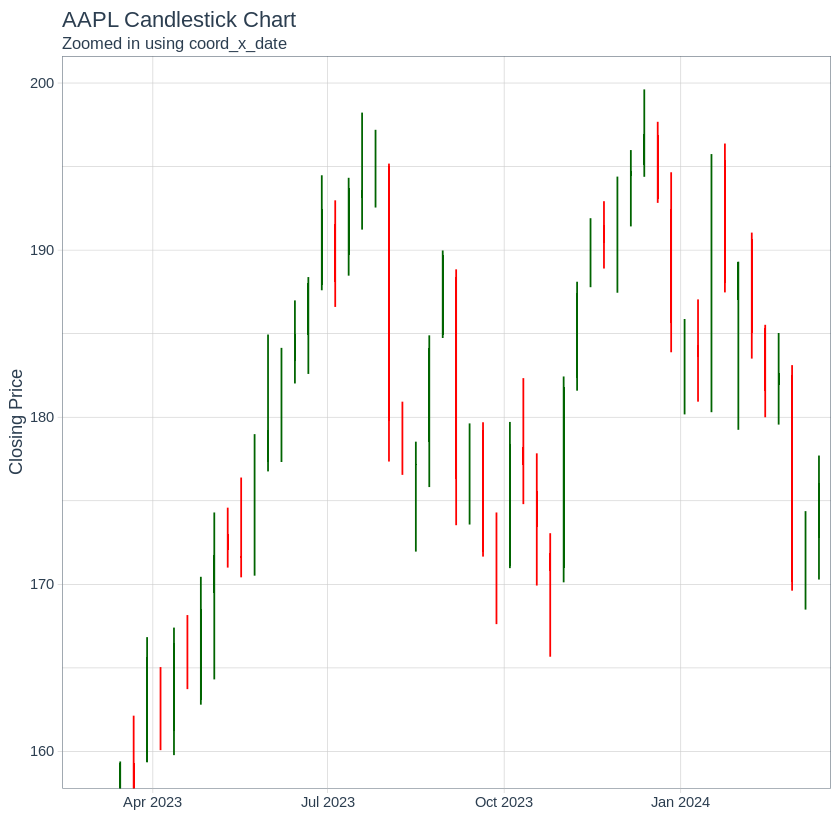

In [ ]:
#Zoom in of the last 52 weeks
weeks_back <- 52

#Adjustment of zoom
end <- as_date("2024-03-01")
aapl_range_60_tbl <- aapl_weekly_data %>%
    tail(weeks_back) %>%
    summarise(
        max_high = max(high),
        min_low  = min(low)
    )

aapl_weekly_data %>%
    ggplot(aes(x = date, y = close)) +
    geom_candlestick(aes(open = open, high = high, low = low, close = close), colour_up = "darkgreen", fill_up = "darkgreen") +
    labs(title = "AAPL Candlestick Chart",
         subtitle = "Zoomed in using coord_x_date",
         y = "Closing Price", x = "") +
    coord_x_date(xlim = c(end - weeks(weeks_back), end),
                 c(aapl_range_60_tbl$min_low, aapl_range_60_tbl$max_high)) +
    theme_tq()

[1] "ts"

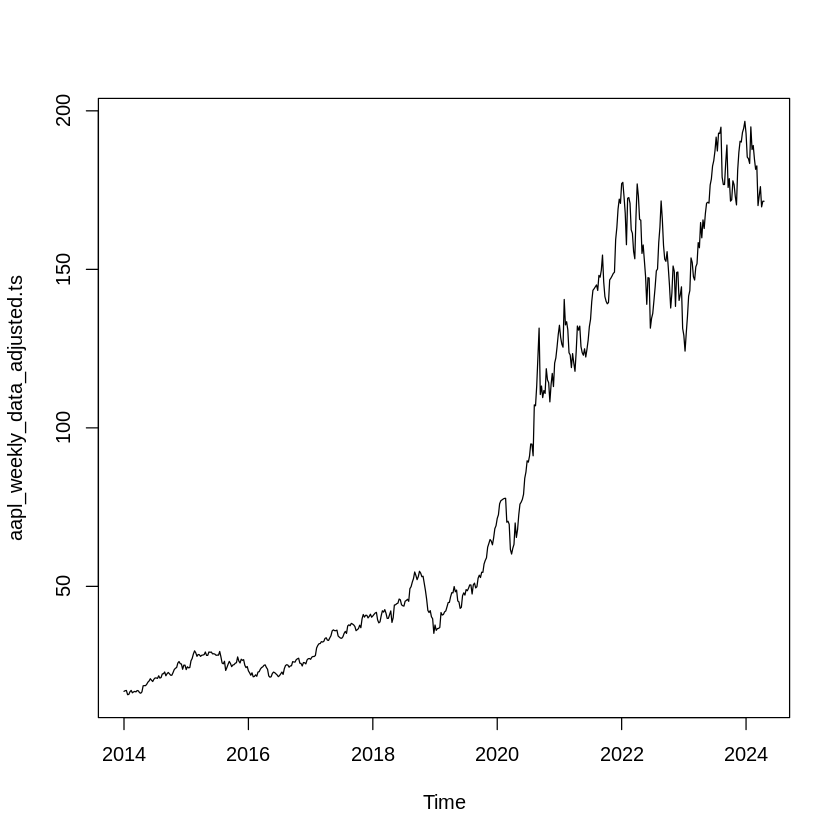

In [ ]:
#Creation of time serie
aapl_weekly_data_adjusted.ts <- ts(aapl_weekly_data_adjusted$adjusted, start = c(2014,1), frequency = 52)
class(aapl_weekly_data_adjusted.ts)
plot(aapl_weekly_data_adjusted.ts)

In [ ]:
#Check for missing values
sum(is.na(aapl_weekly_data_adjusted.ts))
#Drop any missing values
aapl_weekly_data_adjusted.ts <- na.remove(aapl_weekly_data_adjusted.ts)
#Check
sum(is.na(aapl_weekly_data_adjusted.ts))

In [ ]:
#We test whether the data is stationary or not with Augmented Dickey-Fuller Test.
adf.test(aapl_weekly_data_adjusted.ts)
#The data is NOT stationary.


	Augmented Dickey-Fuller Test

data:  aapl_weekly_data_adjusted.ts
Dickey-Fuller = -2.1397, Lag order = 8, p-value = 0.5192
alternative hypothesis: stationary


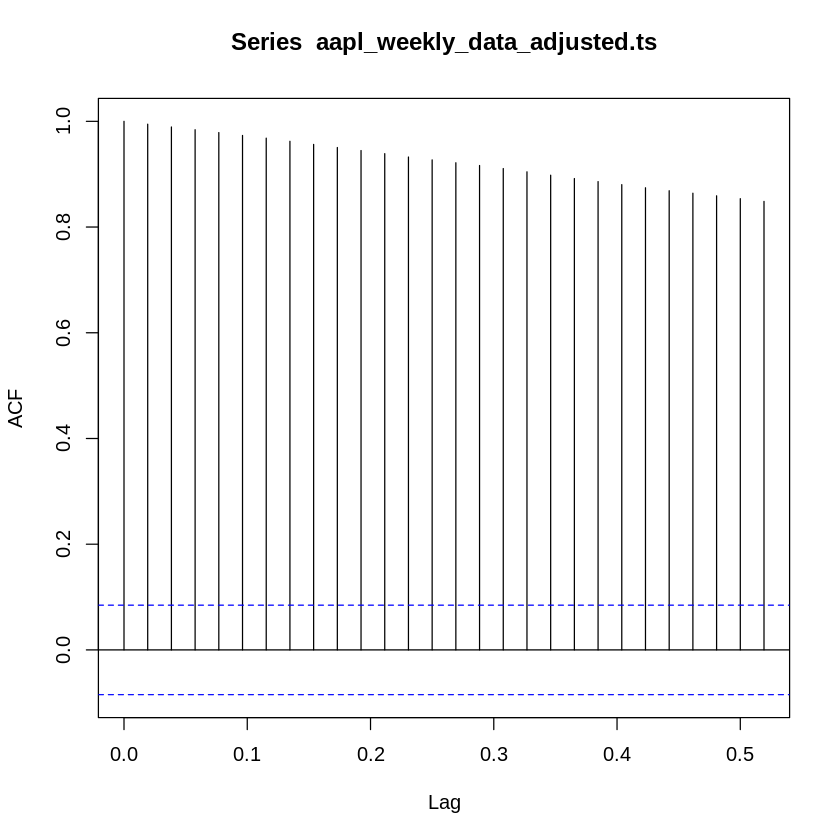

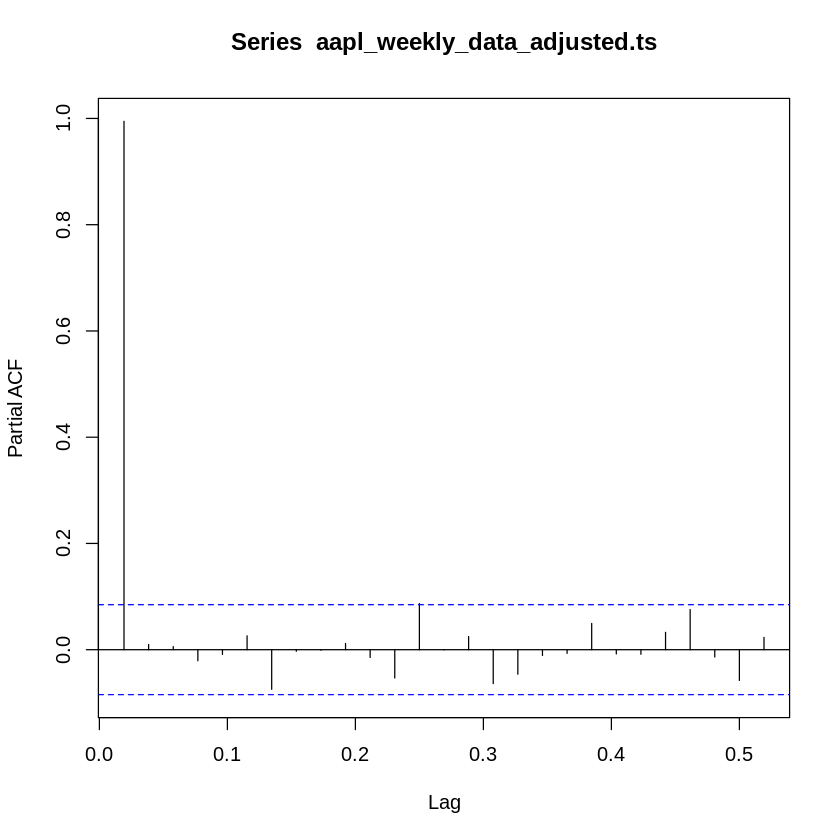

In [ ]:
#Checking for autocorrelation with ACF and PACF
acf(aapl_weekly_data_adjusted.ts)
pacf(aapl_weekly_data_adjusted.ts)
#We can see strong autocorrelation in most of the serie.

[1] 1

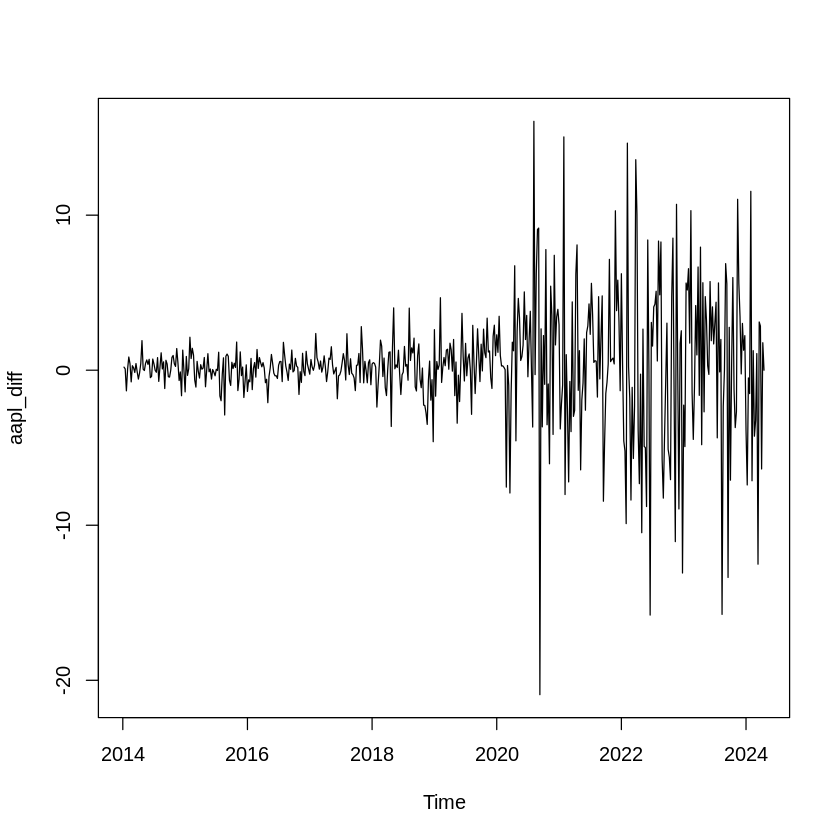

In [ ]:
#Let's check if differences can help us
ndiffs(aapl_weekly_data_adjusted.ts)
aapl_diff <- diff(aapl_weekly_data_adjusted.ts, lag = 1)
#However, we will encounter missing values in the differenced data,
#so they will be replaced with the values from the last observation.
aapl_diff <- na.locf(aapl_diff, na.rm = TRUE, fromLast = TRUE)
plot(aapl_diff)

In [ ]:
#We check again for stationarity
adf.test(aapl_diff)
#P-value 0.01, the serie is stationary

Warning message in adf.test(aapl_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  aapl_diff
Dickey-Fuller = -8.741, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


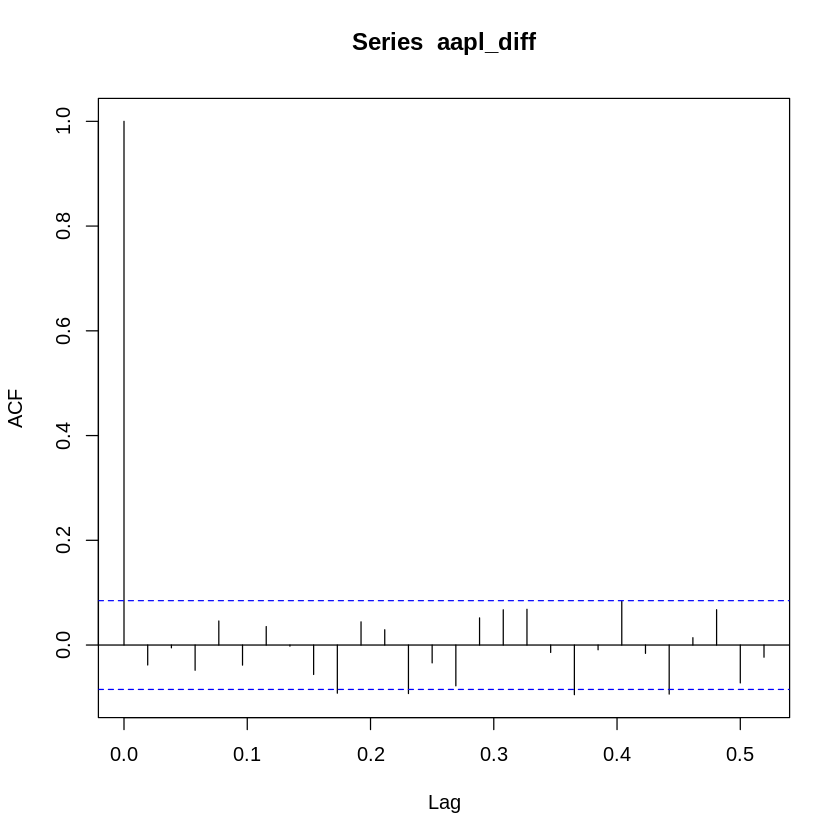

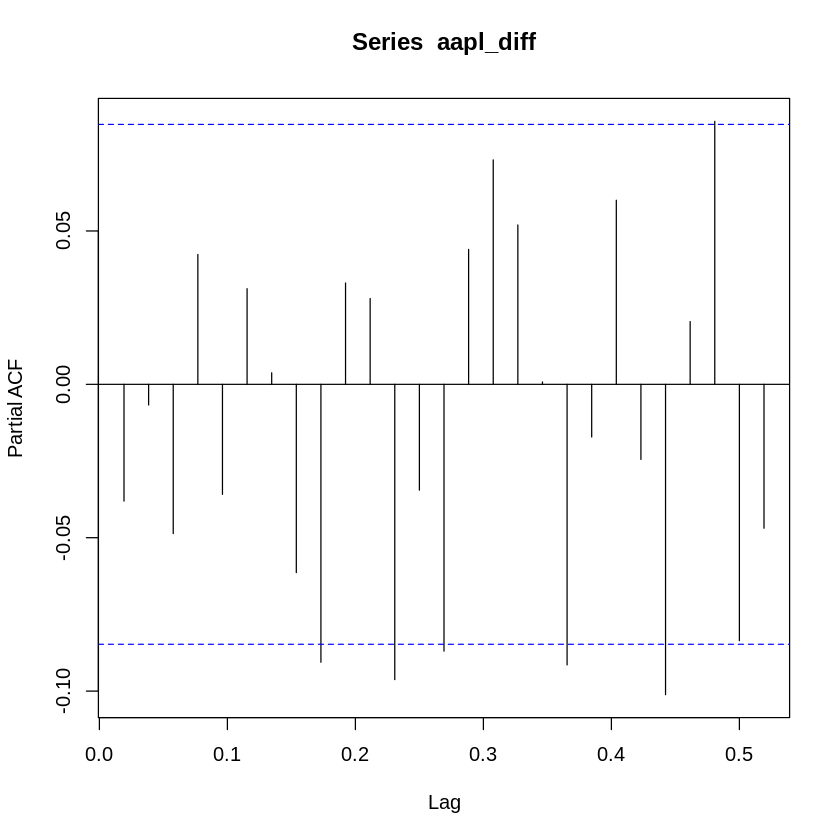

In [ ]:
#Re-do ACF and PACF
acf(aapl_diff)
pacf(aapl_diff)
#ACF shows a wave pattern, indicating our data might fit an autoregressive model.
#PACF looks great, no major issues on sight.

In [ ]:
#We will use a cross validation scheme,
#where we will use 8 years for train dataset
#and the last 2 for test dataset.
#8 years
years <- (52*2)
train_dataset <- aapl_diff %>% head(length(aapl_diff) - years)

#2 years
test_dataset <- aapl_diff %>% tail(years)

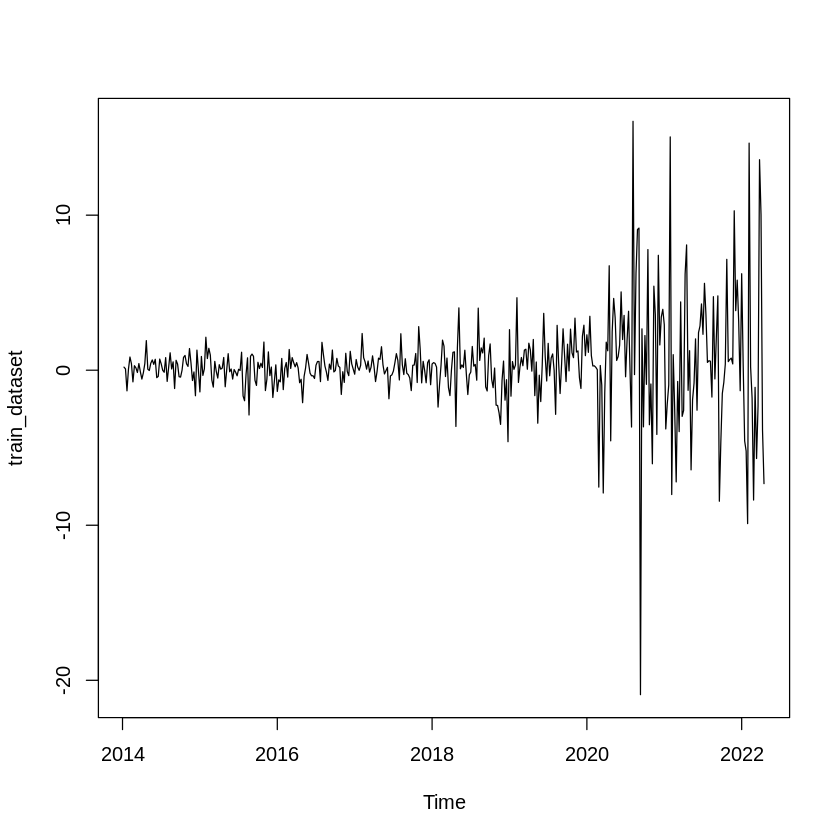

In [ ]:
plot(train_dataset)

In [ ]:
#We will use auto.arima function to iterate over the best models
autoarima_model <- auto.arima(train_dataset, stationary = TRUE, ic = c("aicc", "aic", "bic"),
                          trace = TRUE)
#It returns a possible model with 1 seasonal moving average


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2)(1,0,1)[52] with non-zero mean : Inf
 ARIMA(0,0,0)            with non-zero mean : 2166.971
 ARIMA(1,0,0)(1,0,0)[52] with non-zero mean : 2214.219
 ARIMA(0,0,1)(0,0,1)[52] with non-zero mean : 2162.114
 ARIMA(0,0,0)            with zero mean     : 2170.723
 ARIMA(0,0,1)            with non-zero mean : 2168.641
 ARIMA(0,0,1)(1,0,1)[52] with non-zero mean : 2214.966
 ARIMA(0,0,1)(0,0,2)[52] with non-zero mean : Inf
 ARIMA(0,0,1)(1,0,0)[52] with non-zero mean : 2213.11
 ARIMA(0,0,1)(1,0,2)[52] with non-zero mean : Inf
 ARIMA(0,0,0)(0,0,1)[52] with non-zero mean : 2160.085
 ARIMA(0,0,0)(1,0,1)[52] with non-zero mean : 2212.947
 ARIMA(0,0,0)(0,0,2)[52] with non-zero mean : Inf
 ARIMA(0,0,0)(1,0,0)[52] with non-zero mean : 2211.101
 ARIMA(0,0,0)(1,0,2)[52] with non-zero mean : Inf
 ARIMA(1,0,0)(0,0,1)[52] with non-zero mean : 2163.115
 ARIMA(1,0,1)(0,0,1)[52] with non-zero mean : 2165.152
 ARIMA(0,0,0)(0,0,1)[52] with 

Series: train_dataset 
ARIMA(0,0,0)(0,0,1)[52] with non-zero mean 

Coefficients:
         sma1    mean
      -0.1452  0.3426
s.e.   0.0517  0.1238

sigma^2 = 8.712:  log likelihood = -1077.61
AIC=2161.21   AICc=2161.27   BIC=2173.41

Training set error measures:
                      ME     RMSE      MAE  MPE MAPE     MASE         ACF1
Training set -0.00512054 2.944752 1.680177 -Inf  Inf 0.693661 0.0002040956


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(0,0,1)[52] with non-zero mean
Q* = 181.24, df = 85, p-value = 6.217e-09

Model df: 1.   Total lags used: 86



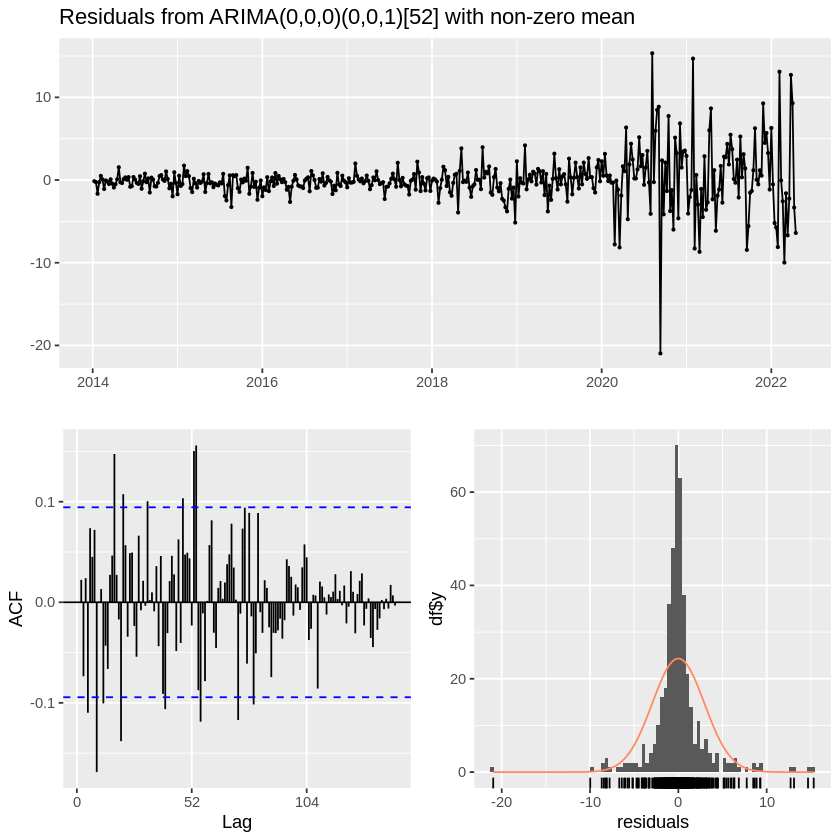

In [ ]:
summary(autoarima_model)
#Check residuals of the auto.arima model with difference in the data
checkresiduals(autoarima_model)
#According to Ljung-Box test, the residuals are autocorrelated
#Additionally, they have kurtosis in the histogram plot.

In [ ]:
#Let's try fixing it with logarithms
#First let's make a copy
aapl_weekly_data_adjusted_logs <- data.frame(aapl_weekly_data_adjusted)
#And convert the data to logarithmic
aapl_weekly_data_adjusted_logs$adjusted <- log(aapl_weekly_data_adjusted_logs$adjusted)
head(aapl_weekly_data_adjusted_logs)

,date,adjusted
,<date>,<dbl>
1,2014-01-01,2.826563
2,2014-01-08,2.838253
3,2014-01-15,2.843146
4,2014-01-22,2.762444
5,2014-01-29,2.766956
6,2014-02-05,2.818980


[1] "ts"

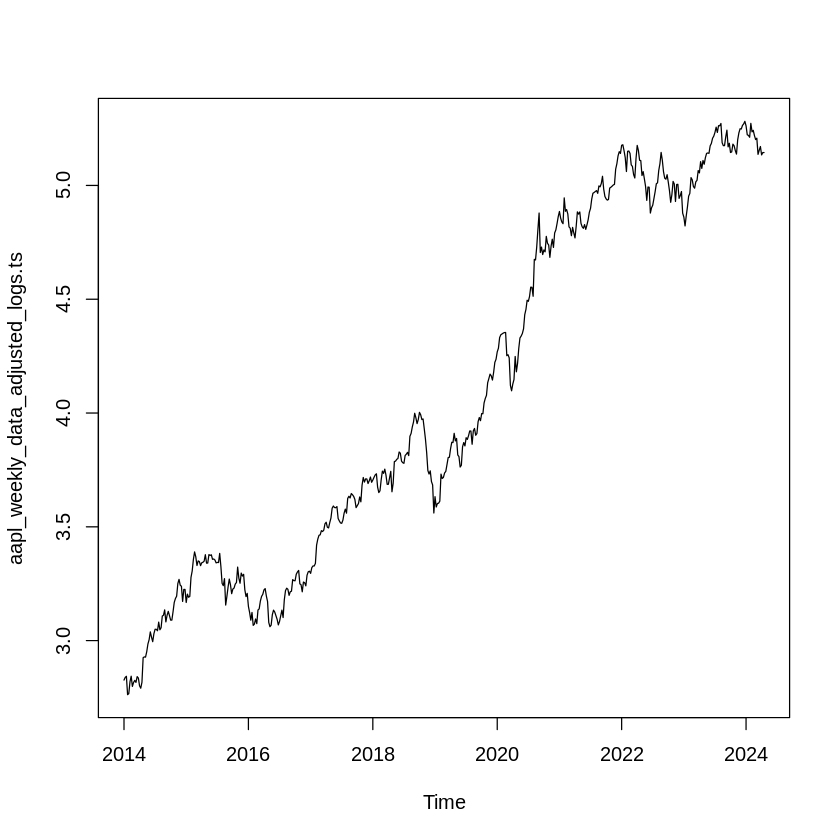

In [ ]:
#Now create the time serie with the logarithm
aapl_weekly_data_adjusted_logs.ts <- ts(aapl_weekly_data_adjusted_logs$adjusted, start = c(2014,1), frequency = 52)
class(aapl_weekly_data_adjusted_logs.ts)
plot(aapl_weekly_data_adjusted_logs.ts)

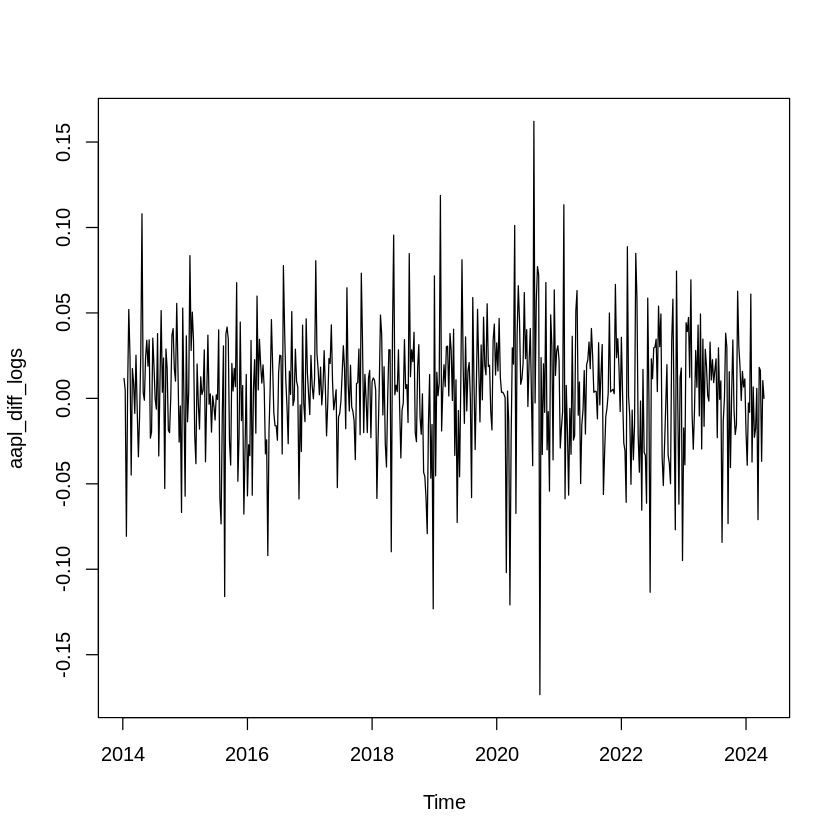

In [ ]:
#Add the difference
aapl_diff_logs <- diff(aapl_weekly_data_adjusted_logs.ts, lag = 1)
#And replace
aapl_diff_logs <- na.locf(aapl_diff_logs, na.rm = TRUE, fromLast = TRUE)
plot(aapl_diff_logs)

In [ ]:
#We repeat the same process but with logs
train_dataset_logs <- aapl_diff_logs %>% head(length(aapl_diff_logs) - years)

#2 years
test_dataset_logs <- aapl_diff_logs %>% tail(years)

In [ ]:
#And create the model with auto.arima
autoarima_model_logs <- auto.arima(train_dataset_logs, stationary = TRUE, ic = c("aicc", "aic", "bic"),
                          trace = TRUE)
#This time it suggests a model with 2 seasonal moving averages


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2)(1,0,1)[52] with non-zero mean : -1598.458
 ARIMA(0,0,0)            with non-zero mean : -1610.665
 ARIMA(1,0,0)(1,0,0)[52] with non-zero mean : -1601.228
 ARIMA(0,0,1)(0,0,1)[52] with non-zero mean : -1610.899
 ARIMA(0,0,0)            with zero mean     : -1604.013
 ARIMA(0,0,1)            with non-zero mean : -1608.716
 ARIMA(0,0,1)(1,0,1)[52] with non-zero mean : -1601.542
 ARIMA(0,0,1)(0,0,2)[52] with non-zero mean : Inf
 ARIMA(0,0,1)(1,0,0)[52] with non-zero mean : -1601.52
 ARIMA(0,0,1)(1,0,2)[52] with non-zero mean : -1606.23
 ARIMA(0,0,0)(0,0,1)[52] with non-zero mean : -1612.858
 ARIMA(0,0,0)(1,0,1)[52] with non-zero mean : -1603.577
 ARIMA(0,0,0)(0,0,2)[52] with non-zero mean : -1614.108
 ARIMA(0,0,0)(1,0,2)[52] with non-zero mean : -1608.262
 ARIMA(1,0,0)(0,0,2)[52] with non-zero mean : -1611.265
 ARIMA(1,0,1)(0,0,2)[52] with non-zero mean : -1609.207
 ARIMA(0,0,0)(0,0,2)[52] with zero mean     : -1607

Series: train_dataset_logs 
ARIMA(0,0,0)(0,0,2)[52] with non-zero mean 

Coefficients:
         sma1    sma2    mean
      -0.1001  0.1173  0.0053
s.e.   0.0490  0.0674  0.0018

sigma^2 = 0.001363:  log likelihood = 810.92
AIC=-1613.83   AICc=-1613.74   BIC=-1597.57

Training set error measures:
                      ME       RMSE        MAE  MPE MAPE      MASE        ACF1
Training set 8.64117e-05 0.03678835 0.02687056 -Inf  Inf 0.6551489 -0.01632588


	Ljung-Box test

data:  Residuals from ARIMA(0,0,0)(0,0,2)[52] with non-zero mean
Q* = 75.623, df = 84, p-value = 0.7315

Model df: 2.   Total lags used: 86



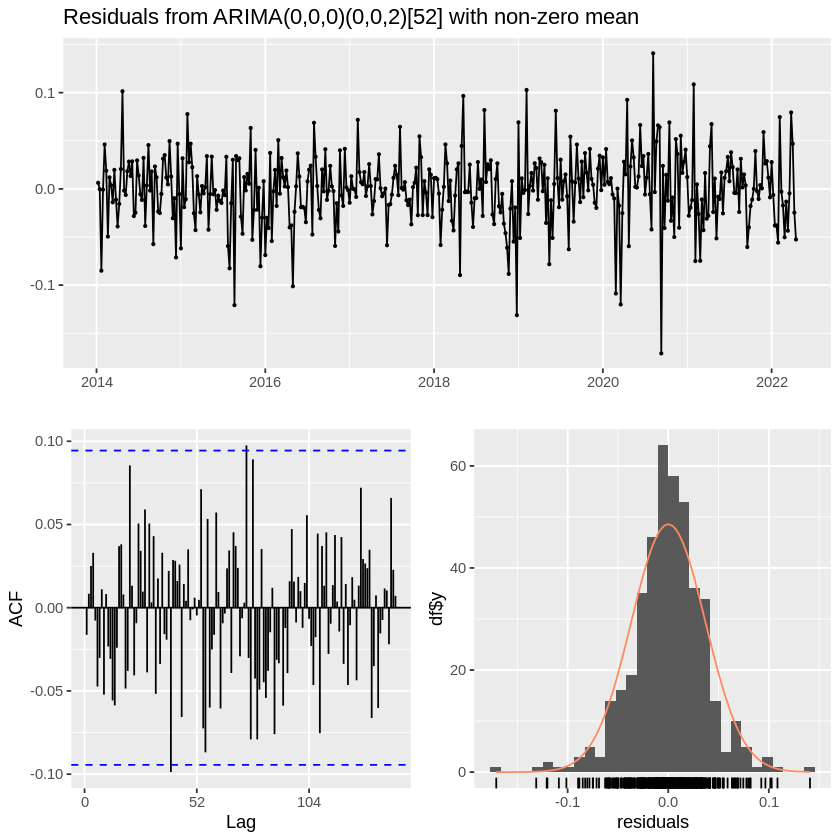

In [ ]:
summary(autoarima_model_logs)
#Checking residuals
checkresiduals(autoarima_model_logs)
#P-value is more than 0.05, residuals are independent and not autocorrelated.
#Kurtosis has been cotrolled.

In [ ]:
#Let's build the model and check the error with our test dataset
model1 <- arima(train_dataset_logs, order = c(0,0,0), seasonal = c(0,0,2))
summary(model1)


Call:
arima(x = train_dataset_logs, order = c(0, 0, 0), seasonal = c(0, 0, 2))

Coefficients:
         sma1    sma2  intercept
      -0.1001  0.1173     0.0053
s.e.   0.0490  0.0674     0.0018

sigma^2 estimated as 0.001353:  log likelihood = 810.92,  aic = -1613.83

Training set error measures:
                      ME       RMSE        MAE  MPE MAPE      MASE        ACF1
Training set 8.64117e-05 0.03678835 0.02687056 -Inf  Inf 0.6862841 -0.01632588

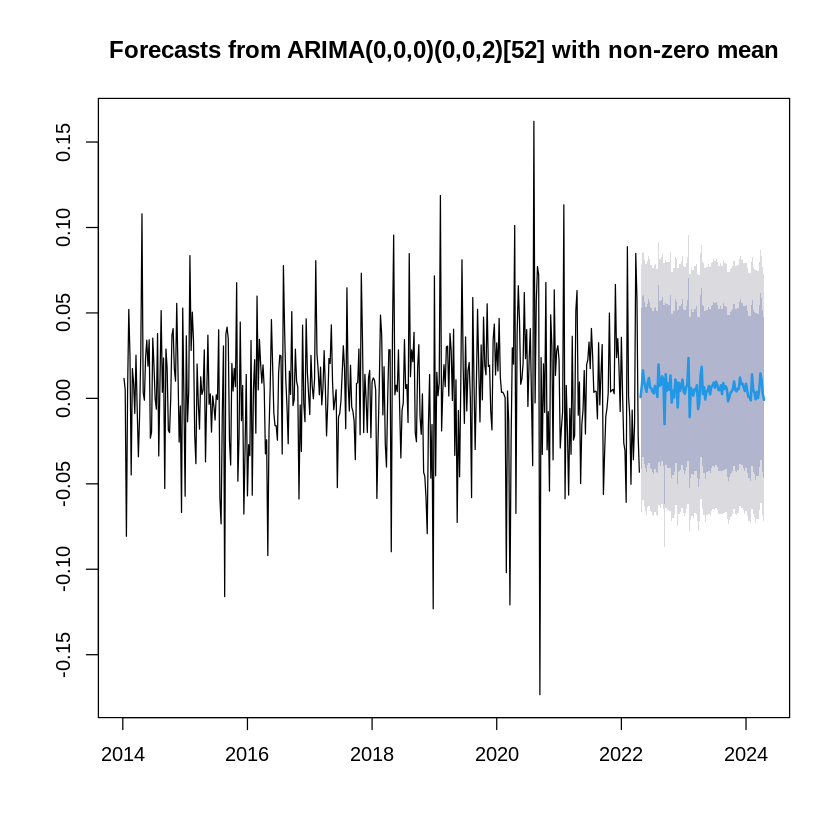

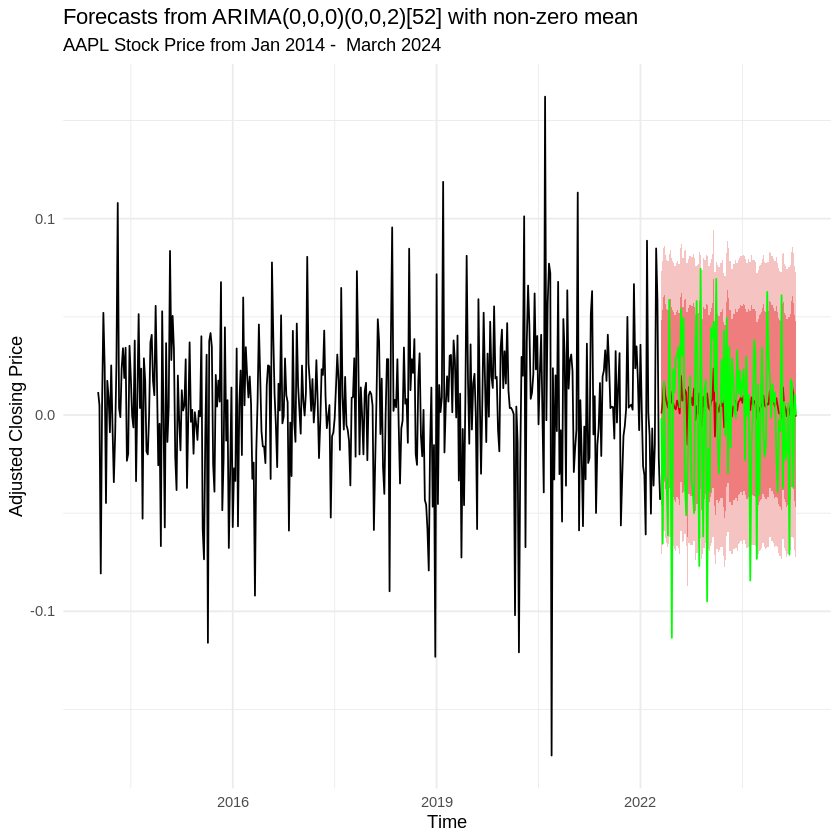

In [ ]:
forecast1 <- forecast(model1, h = 104)
plot(forecast1)
#Comparing model 1 with test data
comparison_forecast_model1 <- autoplot(forecast1, series = "Model 1", fcol = "red") +
  autolayer(test_dataset_logs, series = "Actual", color = "green") +
  labs(subtitle = "AAPL Stock Price from Jan 2014 -  March 2024",
       y = "Adjusted Closing Price") +
  theme_minimal()

comparison_forecast_model1
#This data has one difference.
#Let's make the model without the difference directly in the data.

In [ ]:
#For this, we have to make our train and test data
years <- (52*2)
train_dataset_nodiff <- aapl_weekly_data_adjusted_logs.ts %>% head(length(aapl_diff) - years)

#2 years
test_dataset_nodiff <- aapl_weekly_data_adjusted_logs.ts %>% tail(years)

In [ ]:
#Full model from sratch
model2 <- arima(train_dataset_nodiff, order = c(0,1,0), seasonal = c(0,0,2))
summary(model2)


Call:
arima(x = train_dataset_nodiff, order = c(0, 1, 0), seasonal = c(0, 0, 2))

Coefficients:
         sma1    sma2
      -0.0769  0.1562
s.e.   0.0490  0.0660

sigma^2 estimated as 0.001375:  log likelihood = 805.21,  aic = -1604.42

Training set error measures:
                      ME       RMSE        MAE      MPE      MAPE      MASE
Training set 0.005291423 0.03703351 0.02720814 0.131077 0.7248497 0.9873663
                    ACF1
Training set -0.02116952

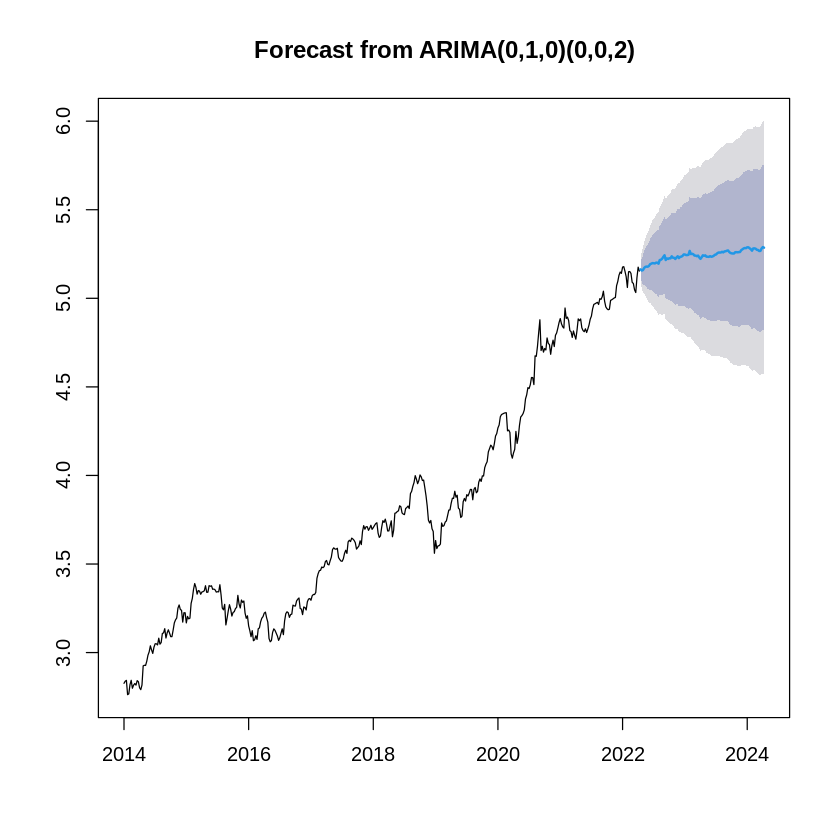

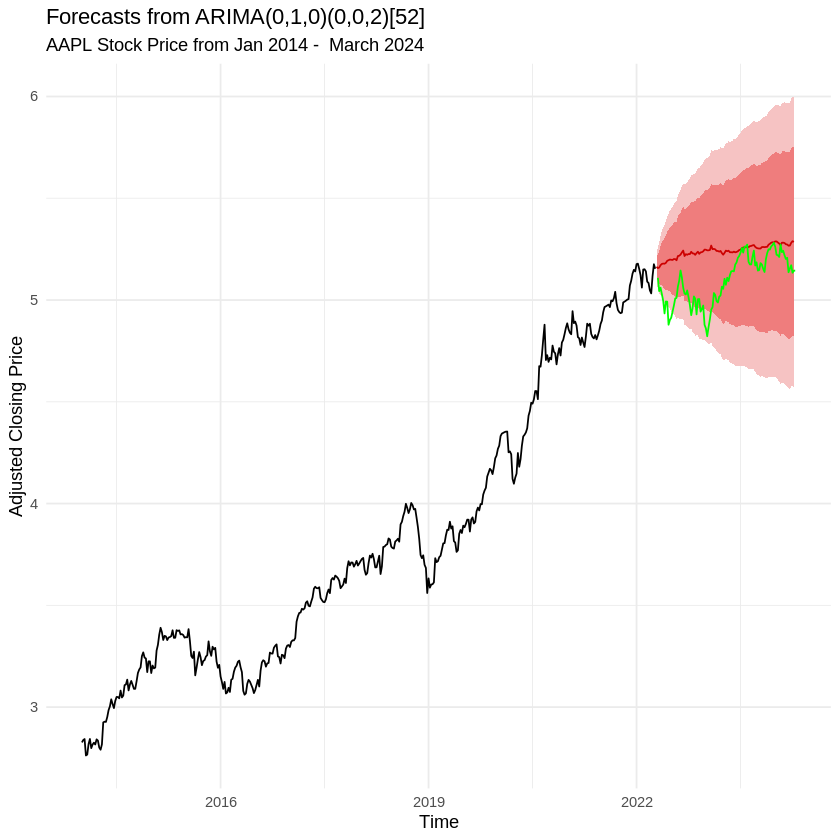

In [ ]:
forecast2 <- forecast(model2, h = 104)
plot(main = "Forecast from ARIMA(0,1,0)(0,0,2)",forecast2)
#Comparing model 2 with test data
comparison_forecast_model2 <- autoplot(forecast2, series = "Model 2", fcol = "red") +
  autolayer(test_dataset_nodiff, series = "Actual", color = "green") +
  labs(subtitle = "AAPL Stock Price from Jan 2014 -  March 2024",
       y = "Adjusted Closing Price") +
  theme_minimal()

comparison_forecast_model2
#The model looks great when compared to the actual data.
#Because of the nature of the SARIMA model it tends to go to the mean.

In [ ]:
#Let's make our model with the complete data
final_model <- arima(aapl_weekly_data_adjusted_logs.ts, order = c(0,1,0), seasonal = c(0,0,2))
summary(final_model)


Call:
arima(x = aapl_weekly_data_adjusted_logs.ts, order = c(0, 1, 0), seasonal = c(0, 
    0, 2))

Coefficients:
         sma1    sma2
      -0.0785  0.0929
s.e.   0.0442  0.0510

sigma^2 estimated as 0.001383:  log likelihood = 1001.39,  aic = -1996.78

Training set error measures:
                      ME       RMSE        MAE       MPE      MAPE      MASE
Training set 0.004255912 0.03715283 0.02767976 0.1059155 0.6979659 0.9938711
                    ACF1
Training set -0.02019133

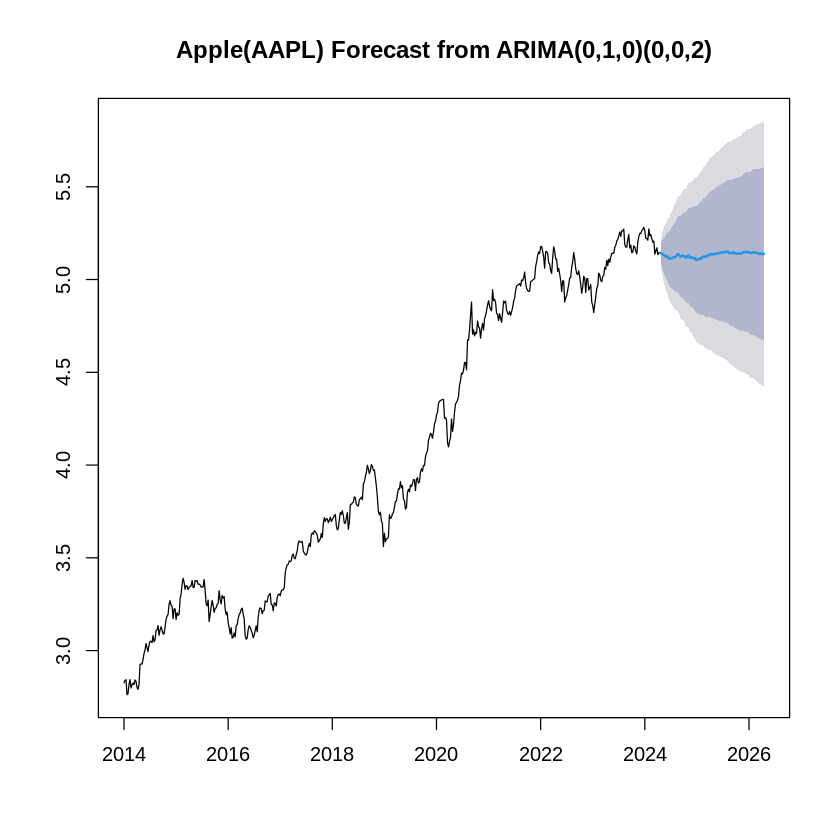

In [ ]:
#Forecast for the next 2 years
final_forecast <- forecast(final_model, h = 104)
plot(main = "Apple(AAPL) Forecast from ARIMA(0,1,0)(0,0,2)",final_forecast)

In [ ]:
# The forecast gives signs of a small downtrend or consolidation phase
# in the next couple of years; this resonates with the recent trend of Apple.
# However, looking at the consolidated statements of the current year,
# Apple has shown a strong improvement in sales and an increment in total assets.
# This makes us believe that the current performance is only short-term
# and it will continue with its expected growth once this period passes.